In [137]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

## 1. Format the Data

In [92]:
airports = pd.read_csv('../../assets/datasets/airport2.csv')

In [93]:
airports.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42


Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [94]:
airports.Airport = airports.Airport.map(lambda x: 1 if x == 'ABQ' else 2 if x == 'ANC' else 3)

In [95]:
airports

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,1,2004,242,235,71,46
1,1,2005,221,190,61,33
2,1,2006,392,329,71,124
3,1,2007,366,304,107,45
4,1,2008,333,300,79,42
5,1,2009,192,162,74,26
6,1,2010,222,177,71,50
7,1,2011,345,294,77,61
8,1,2012,237,181,65,60
9,1,2013,232,212,62,46


## 2. Plot the data

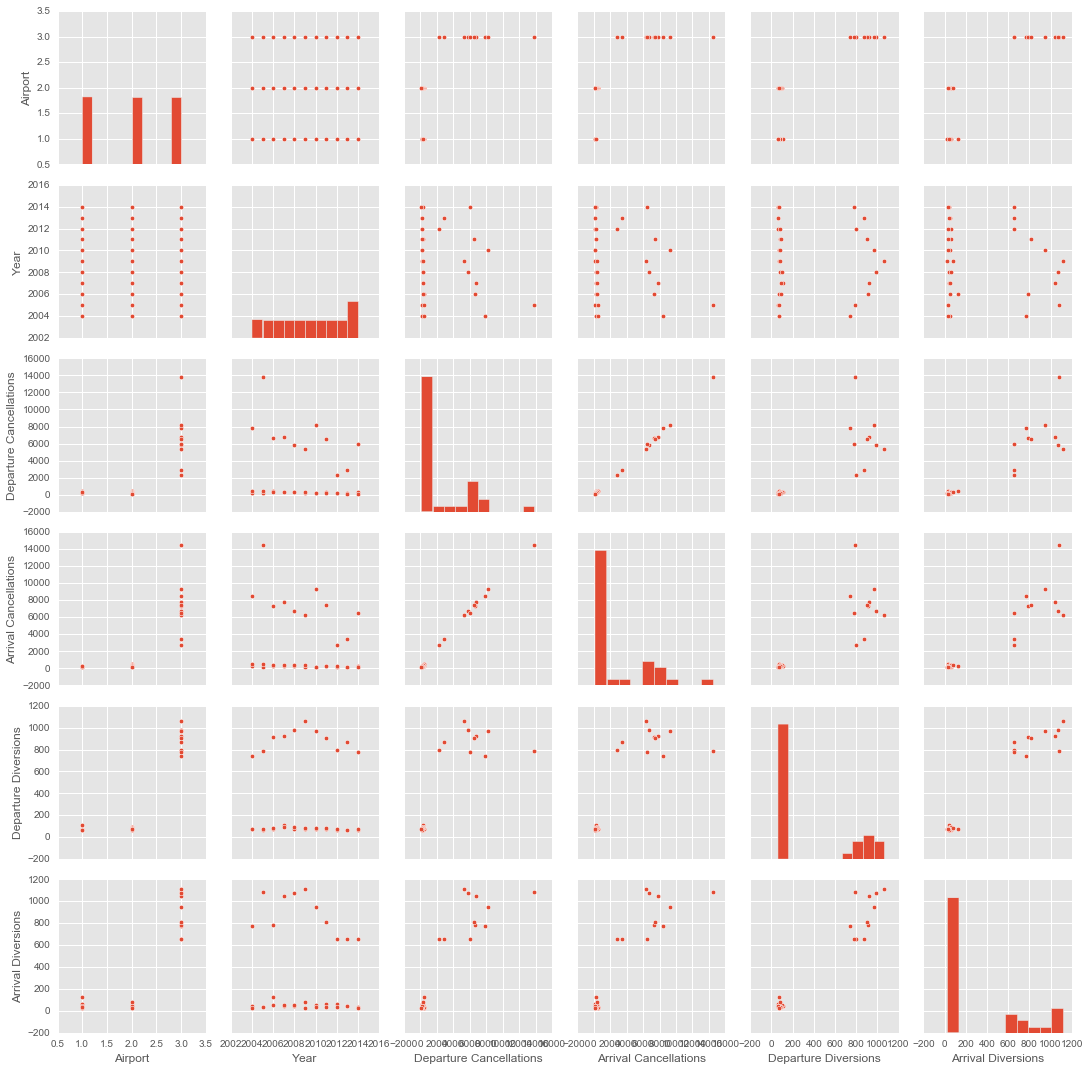

In [13]:
sns.pairplot(airports)

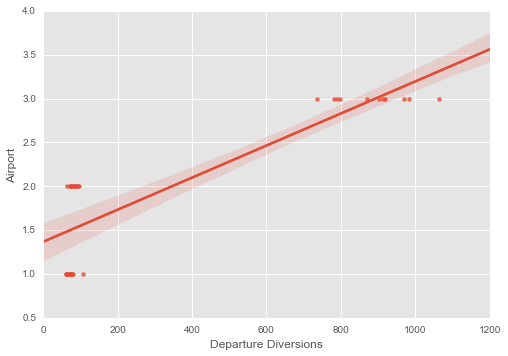

In [40]:
sns.regplot(x = 'Departure Diversions', y = 'Airport', data = airports)

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [96]:
Y = pd.DataFrame(airports.Airport)
X = airports[['Departure Cancellations', 'Arrival Diversions']]

#### 3.2 Conduct the k-means clustering

In [104]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### 3.3 Compute the labels and centroids

In [147]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
cc = pd.DataFrame(centroids)

In [106]:
print centroids
print labels

[[   471.875          98.08333333]
 [  6646.75          900.5       ]
 [ 13837.           1080.        ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 1 1 0 0 1]


#### 3.4 Format the resulting predicted clusters and check the inertia, silhouette, and elbow metric.

In [153]:
predY = np.choose(labels, [1, 3, 2]).astype(np.int64)

In [154]:
metrics.accuracy_score(Y, predY)

0.5757575757575758

In [109]:
inertia = kmeans.inertia_
print inertia

17866103.9583


In [140]:
metrics.silhouette_score(airports, labels, metric='euclidean')

0.87758491958299389

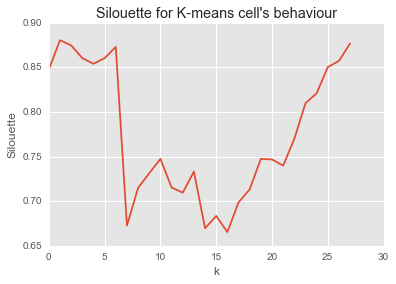

In [168]:
scores = []
SSE = []

for n_clusters in range(2,30):
    
    kmeans = cluster.KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    
    scores.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    SSE.append(inertia.mean())

plt.plot(scores)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

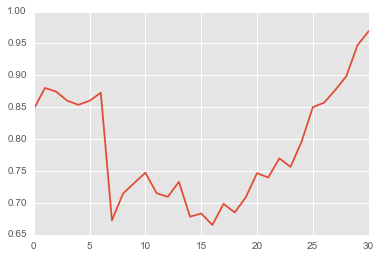

In [164]:
scores = []
SSE = []

for n_clusters in range(2, 33):
    kmeans = cluster.KMeans(n_clusters = n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    scores.append(metrics.silhouette_score(X, labels, metric = 'euclidean'))
    SSE.append(inertia.mean())

plt.plot(scores)
sns.despine()

**Question**: What are we understand from this these performance metrics? 

## KNN Classifier

Select a target, and attempt to train your model against it.

## 4. KNN Classifier

** \*BONUS BONUS\* **

We haven't gone over hierarchical clustering but we may review this in class briefly, then in more depth in the future.

## 5. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

#### 6.2 Plot the Denrogram

## Extra Trees Classifier

Research this method and attempt to implement it.  This is completely optional.

## 6. Extra Trees Classifier